In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../input/covid19-global-forecasting-week-3/train.csv')
test = pd.read_csv('../input/covid19-global-forecasting-week-3/test.csv')

In [3]:
df = train

In [4]:
df['Province_State'] = df['Province_State'].fillna('Unkown State')
test['Province_State'] = test['Province_State'].fillna('Unkown State')

In [5]:
total_cases_datewise = df.groupby('Date')[['ConfirmedCases', 'Fatalities']].sum().reset_index()
total_cases_datewise = pd.melt(total_cases_datewise, id_vars=['Date'], value_vars=['ConfirmedCases', 'Fatalities'])
total_cases_datewise

Date        variable    value
0    2020-01-22  ConfirmedCases    554.0
1    2020-01-23  ConfirmedCases    653.0
2    2020-01-24  ConfirmedCases    939.0
3    2020-01-25  ConfirmedCases   1432.0
4    2020-01-26  ConfirmedCases   2113.0
..          ...             ...      ...
149  2020-04-03      Fatalities  58782.0
150  2020-04-04      Fatalities  64601.0
151  2020-04-05      Fatalities  69369.0
152  2020-04-06      Fatalities  74560.0
153  2020-04-07      Fatalities  81858.0

[154 rows x 3 columns]

In [6]:
# --- plotly ---
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.templates.default = "plotly_dark"

In [7]:
fig = px.line(total_cases_datewise, x="Date", y="value", color="variable", title="worlwide cases trend")
fig.show()

In [8]:
lastDayCases = df[df['Date'] == '2020-04-04']
lastDayCases = lastDayCases[lastDayCases['ConfirmedCases']>5000]
countryWiseLastDayCases = lastDayCases.groupby(['Country_Region'])[['ConfirmedCases', 'Fatalities']].sum().reset_index()

countryWiseLastDayCases = countryWiseLastDayCases.sort_values('ConfirmedCases', ascending=False)

countryWiseLastDayCases = pd.melt(countryWiseLastDayCases, id_vars=['Country_Region'], value_vars=['ConfirmedCases', 'Fatalities'])

fig = px.bar(countryWiseLastDayCases.iloc[::-1],
             x='value', y='Country_Region', color='variable', barmode='group',
             title=f'Confirmed Cases/Deaths', text='value', height=1200, orientation='h')
fig.show()


In [9]:
countrywiseRiseInCases=df.groupby(['Date','Country_Region'])[['ConfirmedCases', 'Fatalities']].sum().reset_index()
fig = px.line(countrywiseRiseInCases, x="Date", y="ConfirmedCases", color="Country_Region", title="Contrywise Confirmed cases trend")
fig.show()

In [10]:
fig = px.line(countrywiseRiseInCases, x="Date", y="Fatalities", color="Country_Region", title="Contrywise Mortality trend")
fig.show()

In [11]:
test1 = df.loc[:,['Date', 'Country_Region', 'ConfirmedCases']].sort_values('Date')

In [12]:

fig = px.scatter_geo(test1, locations="Country_Region",locationmode ="country names", color="ConfirmedCases",
                     hover_name="Country_Region", size="ConfirmedCases",
                     animation_frame="Date",
                     projection="natural earth", title="Geospatial analysis of Confirmed cases")
fig.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import string

<BarContainer object of 180 artists>

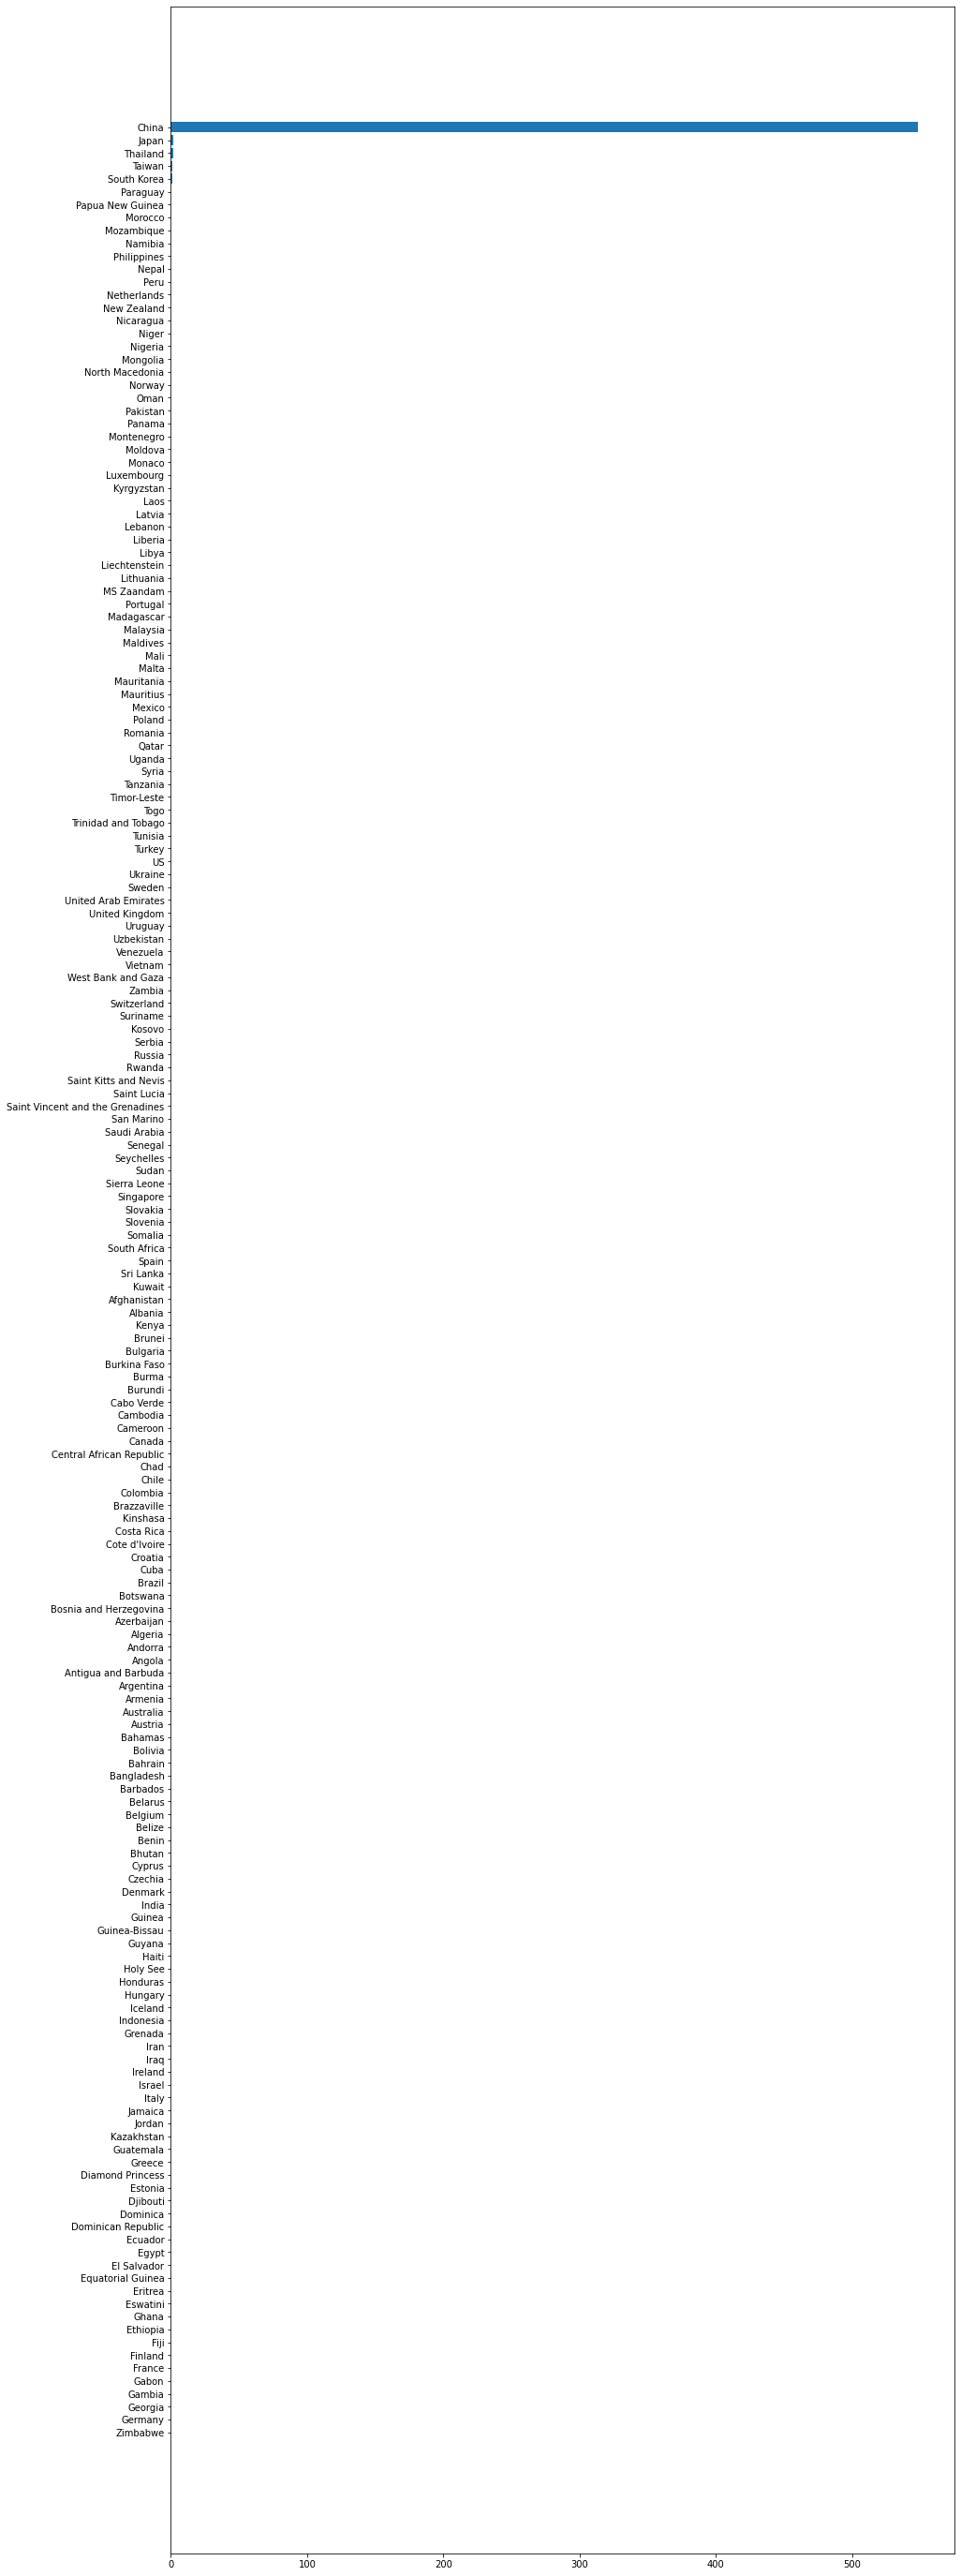

In [14]:
test1 = df.groupby(['Date','Country_Region'])[['ConfirmedCases']].sum().reset_index()
test1['Country_Region'] = [s.replace('Taiwan*', 'Taiwan') for s in test1['Country_Region']]
test1['Country_Region'] = [s.replace('Korea, South', 'South Korea') for s in test1['Country_Region']]
test1['Country_Region'] = [s.replace('Congo (Brazzaville)', 'Brazzaville') for s in test1['Country_Region']]
test1['Country_Region'] = [s.replace('Congo (Kinshasa)', 'Kinshasa') for s in test1['Country_Region']]
test1['Country_Region'] = [s.replace('Congo (Kinshasa)', 'Kinshasa') for s in test1['Country_Region']]
minyear = test1['Date'].min()
dff = (test1[test1['Date'].eq(minyear)]
       .sort_values(by='ConfirmedCases', ascending=False))
       #.head(10))

fig, ax = plt.subplots(figsize=(15, 50))
dff=dff[::-1]
ax.barh(dff['Country_Region'], dff['ConfirmedCases'])


In [15]:
import seaborn as sns
palette = sns.color_palette(None, 180).as_hex()

colors = dict(zip(
    test1['Country_Region'].unique().tolist(),
    palette
))

colors

{'Afghanistan': '#1f77b4',
 'Albania': '#ff7f0e',
 'Algeria': '#2ca02c',
 'Andorra': '#d62728',
 'Angola': '#9467bd',
 'Antigua and Barbuda': '#8c564b',
 'Argentina': '#e377c2',
 'Armenia': '#7f7f7f',
 'Australia': '#bcbd22',
 'Austria': '#17becf',
 'Azerbaijan': '#1f77b4',
 'Bahamas': '#ff7f0e',
 'Bahrain': '#2ca02c',
 'Bangladesh': '#d62728',
 'Barbados': '#9467bd',
 'Belarus': '#8c564b',
 'Belgium': '#e377c2',
 'Belize': '#7f7f7f',
 'Benin': '#bcbd22',
 'Bhutan': '#17becf',
 'Bolivia': '#1f77b4',
 'Bosnia and Herzegovina': '#ff7f0e',
 'Botswana': '#2ca02c',
 'Brazil': '#d62728',
 'Brunei': '#9467bd',
 'Bulgaria': '#8c564b',
 'Burkina Faso': '#e377c2',
 'Burma': '#7f7f7f',
 'Burundi': '#bcbd22',
 'Cabo Verde': '#17becf',
 'Cambodia': '#1f77b4',
 'Cameroon': '#ff7f0e',
 'Canada': '#2ca02c',
 'Central African Republic': '#d62728',
 'Chad': '#9467bd',
 'Chile': '#8c564b',
 'China': '#e377c2',
 'Colombia': '#7f7f7f',
 'Brazzaville': '#bcbd22',
 'Kinshasa': '#17becf',
 'Costa Rica': '#1f7

Text(1, 0.4, '2020-01-22')

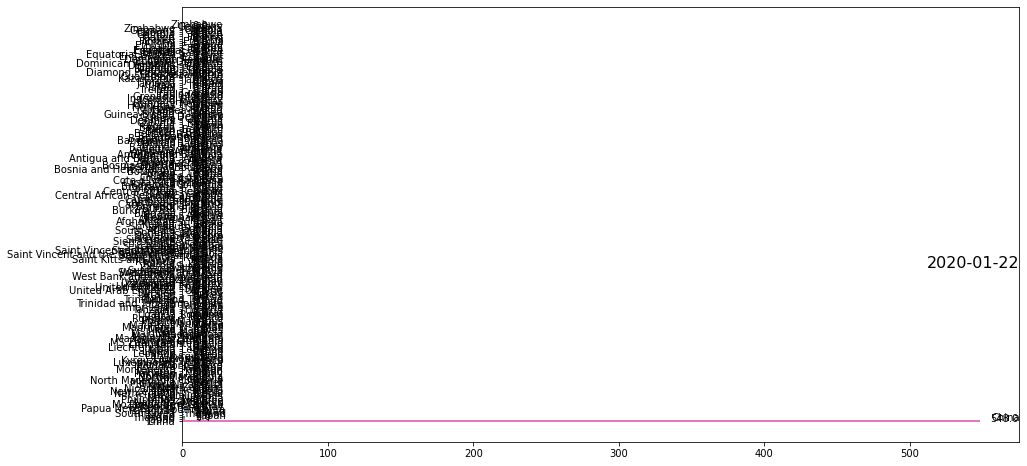

In [16]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['Country_Region'], dff['ConfirmedCases'], color=[colors[x] for x in dff['Country_Region']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (name, value) in enumerate(zip(dff['Country_Region'], dff['ConfirmedCases'])):
    #print(i , value, name)
    ax.text(value+28, i,     name,            ha='right')  # Tokyo: name
    ax.text(value+7, i-0.4,     value,           ha='left')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.4, minyear, transform=ax.transAxes, size=16, ha='right')

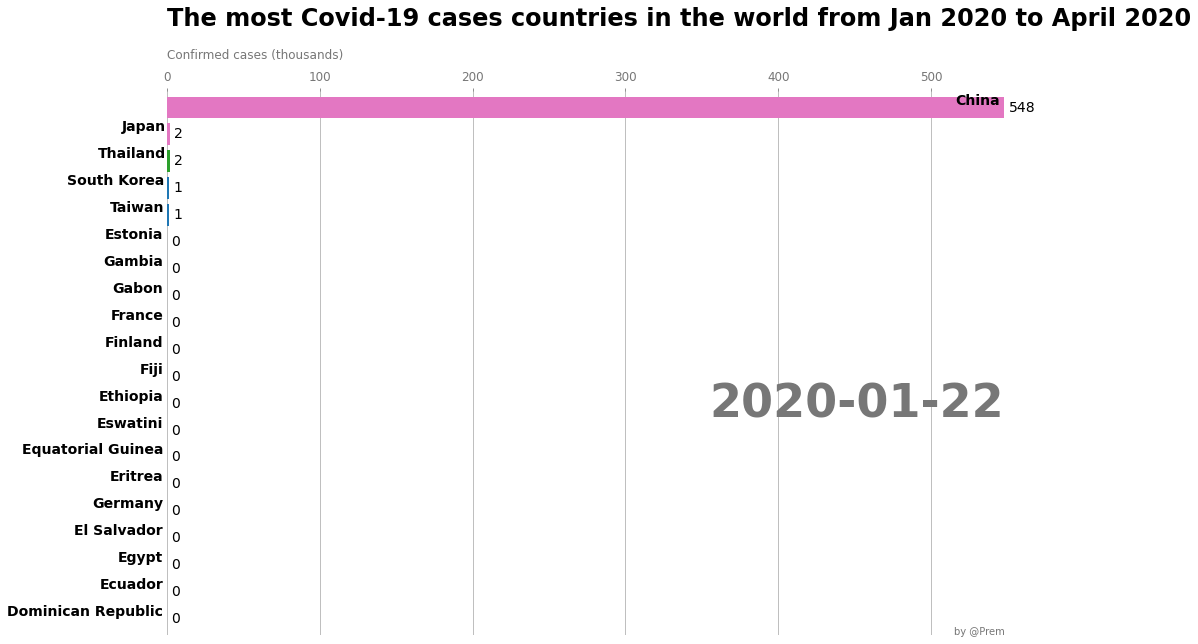

In [17]:
minyear = test1['Date'].min()

fig, ax = plt.subplots(figsize=(15, 10))
def draw_barchart(date):
    dff = test1[test1['Date'].eq(date)].sort_values(by='ConfirmedCases', ascending=True).tail(20)
    ax.clear()
    ax.barh(dff['Country_Region'], dff['ConfirmedCases'], color=[colors[x] for x in dff['Country_Region']])
    dx = dff['ConfirmedCases'].max() / 200
    for i, (name, value) in enumerate(zip(dff['Country_Region'], dff['ConfirmedCases'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
        
    # ... polished styles
    ax.text(1, 0.4, date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Confirmed cases (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most Covid-19 cases countries in the world from Jan 2020 to April 2020',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @Prem', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(minyear)

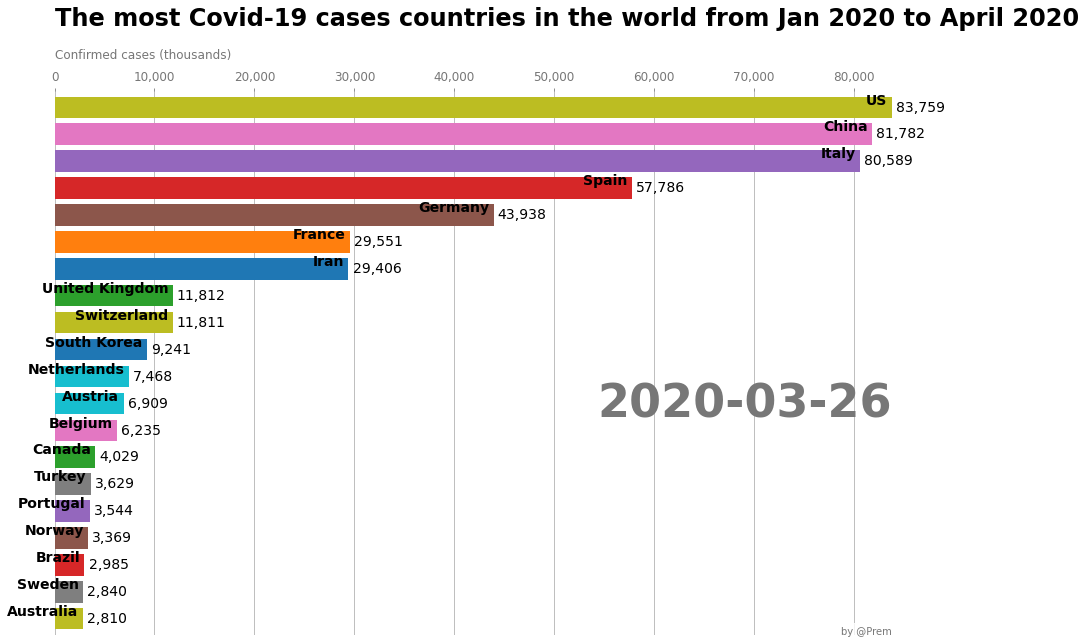

In [18]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 10))
animator = animation.FuncAnimation(fig, draw_barchart, frames=test['Date'].unique().tolist())
HTML(animator.to_jshtml()) 
# oranimator.to_html5_video() or animator.save()

In [19]:
df['Country_Region'] = [s.replace('Taiwan*', 'Taiwan') for s in df['Country_Region']]
df['Country_Region'] = [s.replace('Korea, South', 'South Korea') for s in df['Country_Region']]
df['Country_Region'] = [s.replace('Congo (Brazzaville)', 'Brazzaville') for s in df['Country_Region']]
df['Country_Region'] = [s.replace('Congo (Kinshasa)', 'Kinshasa') for s in df['Country_Region']]
df['Country_Region'] = [s.replace('Congo (Kinshasa)', 'Kinshasa') for s in df['Country_Region']]

df1 = df.sort_values('Date')

df1_test = test.sort_values('Date')

In [20]:
df1_test

ForecastId Province_State      Country_Region        Date
0               1   Unkown State         Afghanistan  2020-03-26
4343         4344   Unkown State            Dominica  2020-03-26
4386         4387   Unkown State  Dominican Republic  2020-03-26
4429         4430   Unkown State             Ecuador  2020-03-26
4472         4473   Unkown State               Egypt  2020-03-26
...           ...            ...                 ...         ...
8642         8643   Unkown State             Romania  2020-05-07
8685         8686   Unkown State              Russia  2020-05-07
8728         8729   Unkown State              Rwanda  2020-05-07
8814         8815   Unkown State         Saint Lucia  2020-05-07
13157       13158   Unkown State            Zimbabwe  2020-05-07

[13158 rows x 4 columns]

In [21]:
df1['year'] = pd.to_datetime(df1['Date']).dt.year
df1['month'] = pd.to_datetime(df1['Date']).dt.month
df1['day'] = pd.to_datetime(df1['Date']).dt.day

df1_test['year'] = pd.to_datetime(df1_test['Date']).dt.year
df1_test['month'] = pd.to_datetime(df1_test['Date']).dt.month
df1_test['day'] = pd.to_datetime(df1_test['Date']).dt.day

In [22]:
bridge_df = df1
bridge_df1 = df1_test


In [23]:
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

In [24]:
bridge_df1

ForecastId Province_State      Country_Region        Date  year  month  \
0               1   Unkown State         Afghanistan  2020-03-26  2020      3   
4343         4344   Unkown State            Dominica  2020-03-26  2020      3   
4386         4387   Unkown State  Dominican Republic  2020-03-26  2020      3   
4429         4430   Unkown State             Ecuador  2020-03-26  2020      3   
4472         4473   Unkown State               Egypt  2020-03-26  2020      3   
...           ...            ...                 ...         ...   ...    ...   
8642         8643   Unkown State             Romania  2020-05-07  2020      5   
8685         8686   Unkown State              Russia  2020-05-07  2020      5   
8728         8729   Unkown State              Rwanda  2020-05-07  2020      5   
8814         8815   Unkown State         Saint Lucia  2020-05-07  2020      5   
13157       13158   Unkown State            Zimbabwe  2020-05-07  2020      5   

       day  
0       26  
4343    26  
4386    26  
4429    26  
4472    26  
...    ...  
8642     7  
8685     7  
8728     7  
8814     7  
13157    7  

[13158 rows x 7 columns]

In [25]:
submission = []
df_train2 = bridge_df
X_train, y_train = df_train2.iloc[:,[6,7,8]], df_train2.iloc[:,4:6]
#model1 for predicting Confirmed Cases
model1 = XGBRegressor(n_estimators=1000)
model1.fit(X_train, y_train.iloc[:,0])
#model2 for predicting Fatalities
model2 = XGBRegressor(n_estimators=1000)
model2.fit(X_train, y_train.iloc[:,1])
#Get the test data for that particular country and state
df_test1 = bridge_df1
ForecastId = df_test1.ForecastId.values
#Remove the unwanted columns
df_test2 = df_test1.iloc[:,[4,5,6]]
#Get the predictions
y_pred1 = model1.predict(df_test2)
y_pred2 = model2.predict(df_test2)
#Append the predicted values to submission list
for i in range(len(y_pred1)):
    d = {'ForecastId':ForecastId[i], 'ConfirmedCases':y_pred1[i], 'Fatalities':y_pred2[i]}
    submission.append(d)

In [26]:
submissiondf = pd.DataFrame.from_dict(submission)
submissiondf.to_csv('submission.csv', index=False)

In [27]:
submissiondf

ForecastId  ConfirmedCases  Fatalities
0               1     1730.395508   78.326927
1            4344     1730.395508   78.326927
2            4387     1730.395508   78.326927
3            4430     1730.395508   78.326927
4            4473     1730.395508   78.326927
...           ...             ...         ...
13153        8643     4659.804199  267.509735
13154        8686     4659.804199  267.509735
13155        8729     4659.804199  267.509735
13156        8815     4659.804199  267.509735
13157       13158     4659.804199  267.509735

[13158 rows x 3 columns]